# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [6]:
city_name = []
country_name = []
lats_list = []
lngs_list = []
date_list = []
temp_list = []
humidity_list = []
cloud_list = []
wind_speed_list = []

index_counter = 0
set_counter = 1

print("Start")
print("-------------------------------")
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country_name.append(response["sys"]["country"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        date_list.append(response["dt"])
        temp_list.append(response['main']['temp_max'])
        humidity_list.append(response["main"]["humidity"])
        cloud_list.append(response["clouds"]["all"])
        wind_speed_list.append(response["wind"]["speed"])
    
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found.")
print("-------------------------------")
print("Complete")
print("-------------------------------")

Start
-------------------------------
Processing Record 1 of Set 1 : arraial do cabo
Processing Record 2 of Set 1 : port hardy
Processing Record 3 of Set 1 : morgan city
Processing Record 4 of Set 1 : balatan
Processing Record 5 of Set 1 : mataura
Processing Record 6 of Set 1 : hay river
Processing Record 7 of Set 1 : punta arenas
Processing Record 8 of Set 1 : puerto ayora
City not found.
Processing Record 9 of Set 1 : road town
Processing Record 10 of Set 1 : jamestown
Processing Record 11 of Set 1 : khani
City not found.
Processing Record 12 of Set 1 : hermanus
Processing Record 13 of Set 1 : hobart
Processing Record 14 of Set 1 : verkhnevilyuysk
Processing Record 15 of Set 1 : san quintin
Processing Record 16 of Set 1 : haldwani
Processing Record 17 of Set 1 : iqaluit
Processing Record 18 of Set 1 : port alfred
Processing Record 19 of Set 1 : gardez
City not found.
City not found.
Processing Record 20 of Set 1 : lorengau
Processing Record 21 of Set 1 : half moon bay
Processing Reco

Processing Record 38 of Set 4 : auki
Processing Record 39 of Set 4 : taksimo
Processing Record 40 of Set 4 : moose factory
Processing Record 41 of Set 4 : geraldton
Processing Record 42 of Set 4 : bengkulu
Processing Record 43 of Set 4 : ahuimanu
Processing Record 44 of Set 4 : dhule
Processing Record 45 of Set 4 : kununurra
Processing Record 46 of Set 4 : kahului
Processing Record 47 of Set 4 : totma
Processing Record 48 of Set 4 : nanpiao
Processing Record 49 of Set 4 : maracay
Processing Record 50 of Set 4 : lompoc
Processing Record 0 of Set 5 : mosquera
Processing Record 1 of Set 5 : lagoa
Processing Record 2 of Set 5 : praxedis guerrero
Processing Record 3 of Set 5 : smithers
Processing Record 4 of Set 5 : rio gallegos
Processing Record 5 of Set 5 : pitsunda
Processing Record 6 of Set 5 : linjiang
Processing Record 7 of Set 5 : ambanja
Processing Record 8 of Set 5 : tuktoyaktuk
Processing Record 9 of Set 5 : poronaysk
Processing Record 10 of Set 5 : shimoda
Processing Record 11 of

Processing Record 28 of Set 8 : blagoyevo
Processing Record 29 of Set 8 : beloha
Processing Record 30 of Set 8 : seguela
Processing Record 31 of Set 8 : flinders
Processing Record 32 of Set 8 : belmonte
Processing Record 33 of Set 8 : gusinoye ozero
Processing Record 34 of Set 8 : ginir
Processing Record 35 of Set 8 : kristinehamn
Processing Record 36 of Set 8 : nabire
Processing Record 37 of Set 8 : dmytrivka
City not found.
Processing Record 38 of Set 8 : longkou
Processing Record 39 of Set 8 : verkhoyansk
Processing Record 40 of Set 8 : matlock
Processing Record 41 of Set 8 : barrie
Processing Record 42 of Set 8 : saint-pierre
Processing Record 43 of Set 8 : klyuchi
Processing Record 44 of Set 8 : sao felix do xingu
Processing Record 45 of Set 8 : mount gambier
Processing Record 46 of Set 8 : porbandar
Processing Record 47 of Set 8 : codajas
Processing Record 48 of Set 8 : iquitos
City not found.
Processing Record 49 of Set 8 : brae
Processing Record 50 of Set 8 : tyup
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_data= pd.DataFrame({
    "City" : city_name,
    "Country" : country_name,
    "Lat" : lats_list,
    "Lng" : lngs_list,
    "Date" : date_list, 
    "Max Temp" : temp_list,
    "Humidity" : humidity_list,
    "Clouds" : cloud_list,
    "Wind Speed" : wind_speed_list
})

In [87]:
weather_data
weather_data.to_csv("cities.csv", encoding="utf-8")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [88]:
clean_city_data = weather_data.loc[weather_data["Humidity"] <= 100]
clean_city_data

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Clouds,Wind Speed
0,Arraial do Cabo,BR,-22.9661,-42.0278,1646351125,76.96,83,0,9.22
1,Port Hardy,CA,50.6996,-127.4199,1646351151,43.75,81,75,11.50
2,Morgan City,US,29.6994,-91.2068,1646351151,70.00,45,0,3.44
3,Balatan,PH,13.3211,123.2333,1646351152,78.87,79,40,3.38
4,Mataura,NZ,-46.1927,168.8643,1646351152,68.49,53,100,2.15
...,...,...,...,...,...,...,...,...,...
539,Forsytheganj,BY,52.6333,29.7333,1646351430,28.85,90,95,8.81
540,Banda Aceh,ID,5.5577,95.3222,1646351430,78.85,77,100,4.70
541,Katwijk,NL,52.1942,4.4222,1646351430,41.02,68,0,11.86
542,Garissa,KE,-0.4536,39.6401,1646351431,77.67,70,20,9.78


In [91]:
#  Get the indices of cities that have humidity over 100%.


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

plt.scatter(weather_data["Lat"], weather_data["Max Temp"], color = "steelblue", edgecolor = "black")
plt.title("Latitude vs.Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

#Save the plotted figures as .pngs.
plt.savefig("fig1.png")


## Latitude vs. Humidity Plot

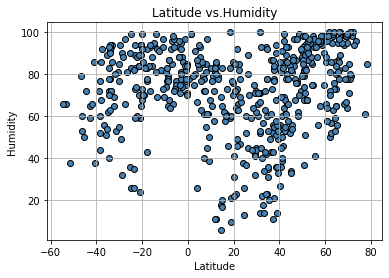

In [92]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], color = "steelblue", edgecolor = "black")
plt.title("Latitude vs.Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

#Save the plotted figures as .pngs.
plt.savefig("fig2.png")

## Latitude vs. Cloudiness Plot

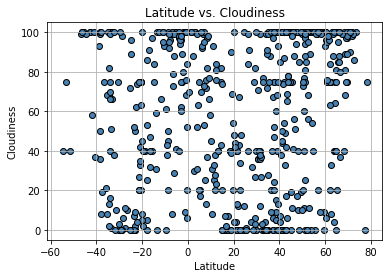

In [16]:
plt.scatter(weather_data["Lat"], weather_data["Clouds"], color = "steelblue", edgecolor = "black")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

#Save the plotted figures as .pngs.
plt.savefig("fig3.png")

## Latitude vs. Wind Speed Plot

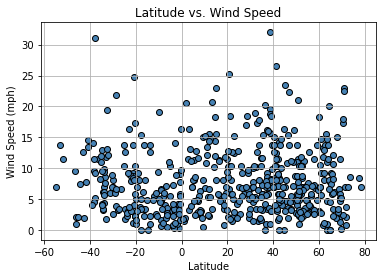

In [17]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], color = "steelblue", edgecolor = "black")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("fig4.png")

## Linear Regression

In [54]:
northern_hemisphere = weather_data.loc[weather_data["Lat"] >= 0]
southern_hemisphere = weather_data.loc[weather_data["Lat"] < 0]

In [84]:
def linear(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq


def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=5,color="red")
    


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

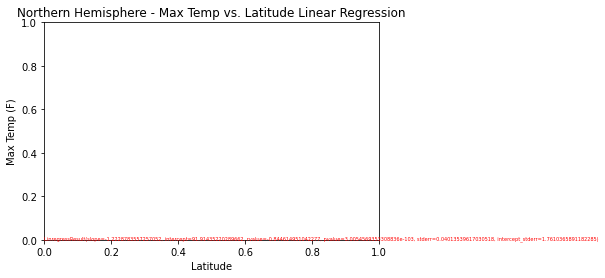

In [86]:
equation = linregress(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")




         
         


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

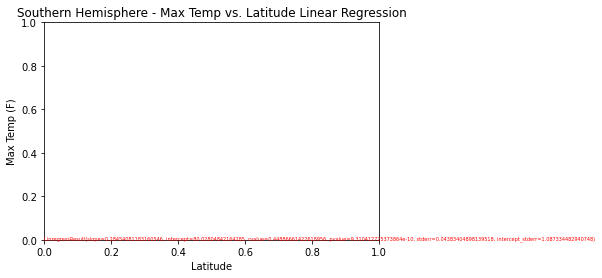

In [93]:
equation = linregress(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])
annotate(equation, 0, 0)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression